# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
new_cities = []
lat = []
lon = []
m_temp = []
humid = []
cloud = []
wind_spd = []
country = []
date = []
record = 1
record_set = 1
length = len(cities)
from datetime import datetime as dt

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
for city in cities:
    response = requests.get(query_url + city).json()

    
    print(f"Processing record {record} of {length}")
    try:
        new_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        m_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        
    except:   
        print("City not found!")
    record += 1
     


Processing record 1 of 610
Processing record 2 of 610
Processing record 3 of 610
Processing record 4 of 610
Processing record 5 of 610
Processing record 6 of 610
Processing record 7 of 610
Processing record 8 of 610
Processing record 9 of 610
Processing record 10 of 610
Processing record 11 of 610
Processing record 12 of 610
Processing record 13 of 610
Processing record 14 of 610
Processing record 15 of 610
Processing record 16 of 610
Processing record 17 of 610
Processing record 18 of 610
Processing record 19 of 610
City not found!
Processing record 20 of 610
City not found!
Processing record 21 of 610
Processing record 22 of 610
Processing record 23 of 610
City not found!
Processing record 24 of 610
City not found!
Processing record 25 of 610
Processing record 26 of 610
Processing record 27 of 610
Processing record 28 of 610
Processing record 29 of 610
City not found!
Processing record 30 of 610
Processing record 31 of 610
Processing record 32 of 610
Processing record 33 of 610
Proce

Processing record 274 of 610
Processing record 275 of 610
Processing record 276 of 610
Processing record 277 of 610
Processing record 278 of 610
Processing record 279 of 610
Processing record 280 of 610
Processing record 281 of 610
Processing record 282 of 610
Processing record 283 of 610
City not found!
Processing record 284 of 610
Processing record 285 of 610
Processing record 286 of 610
Processing record 287 of 610
Processing record 288 of 610
Processing record 289 of 610
Processing record 290 of 610
Processing record 291 of 610
Processing record 292 of 610
Processing record 293 of 610
Processing record 294 of 610
Processing record 295 of 610
Processing record 296 of 610
Processing record 297 of 610
Processing record 298 of 610
Processing record 299 of 610
Processing record 300 of 610
City not found!
Processing record 301 of 610
Processing record 302 of 610
Processing record 303 of 610
Processing record 304 of 610
Processing record 305 of 610
Processing record 306 of 610
Processing 

Processing record 545 of 610
Processing record 546 of 610
Processing record 547 of 610
Processing record 548 of 610
Processing record 549 of 610
Processing record 550 of 610
Processing record 551 of 610
Processing record 552 of 610
Processing record 553 of 610
Processing record 554 of 610
Processing record 555 of 610
Processing record 556 of 610
Processing record 557 of 610
Processing record 558 of 610
Processing record 559 of 610
Processing record 560 of 610
Processing record 561 of 610
Processing record 562 of 610
Processing record 563 of 610
Processing record 564 of 610
Processing record 565 of 610
City not found!
Processing record 566 of 610
City not found!
Processing record 567 of 610
Processing record 568 of 610
Processing record 569 of 610
Processing record 570 of 610
Processing record 571 of 610
Processing record 572 of 610
Processing record 573 of 610
Processing record 574 of 610
Processing record 575 of 610
Processing record 576 of 610
Processing record 577 of 610
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(
    {"City": new_cities,
     "Lat": lat,
     "Lng": lon,
     "Max Temp":m_temp,
     "Humidity":humid,
     "Cloudiness":cloud,
     "Wind Speed":wind_spd,
     "Country":country,
     "Date":date
     }
)
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,73.92,86,95,24.00,PF,1604281811
1,Ushuaia,-54.80,-68.30,57.20,54,75,3.36,AR,1604281801
2,Redwater,33.36,-94.25,57.20,47,1,3.36,US,1604282110
3,New Norfolk,-42.78,147.06,77.00,30,100,3.00,AU,1604282055
4,Vanimo,-2.67,141.30,86.52,64,76,6.80,PG,1604281875


In [5]:
weather_df[weather_df["Humidity"] > 100]
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.539287,17.925722,59.153779,73.197861,51.333333,8.009929,1.604282e+09
std,32.937198,92.156691,21.892649,20.542162,40.842088,6.259589,1.659347e+02
min,-54.800000,-175.200000,-9.420000,1.000000,0.000000,0.270000,1.604282e+09
25%,-7.950000,-65.220000,45.000000,64.000000,1.000000,3.360000,1.604282e+09
50%,22.080000,21.550000,64.400000,78.000000,53.000000,6.060000,1.604282e+09
75%,47.870000,102.260000,77.000000,87.000000,93.000000,10.650000,1.604282e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,39.350000,1.604282e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_df.index[weather_df['Humidity'] > 100].tolist()

[]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
drop_over_humid = weather_df.index[weather_df['Humidity'] > 100].tolist()

In [9]:
weather_df = weather_df.drop(index=drop_over_humid)
weather_df = weather_df.reset_index()
weather_df.head()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Rikitea,-23.12,-134.97,73.92,86,95,24.00,PF,1604281811
1,1,Ushuaia,-54.80,-68.30,57.20,54,75,3.36,AR,1604281801
2,2,Redwater,33.36,-94.25,57.20,47,1,3.36,US,1604282110
3,3,New Norfolk,-42.78,147.06,77.00,30,100,3.00,AU,1604282055
4,4,Vanimo,-2.67,141.30,86.52,64,76,6.80,PG,1604281875


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

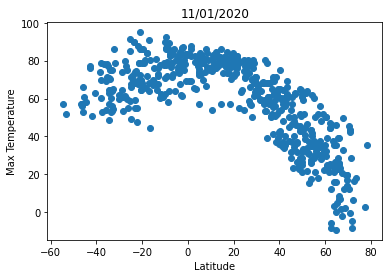

In [26]:
x_lat = weather_df["Lat"]
y_temp = weather_df["Max Temp"]
plt.scatter(x_lat,y_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('11/01/2020')
plt.savefig("Images/Temp_Lat.png")
plt.show()

## Latitude vs. Humidity Plot

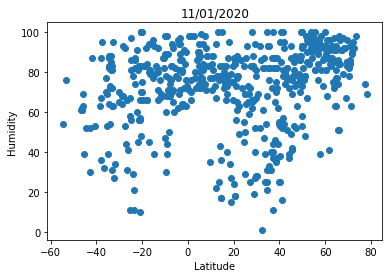

In [27]:
x_lat = weather_df["Lat"]
y_hum = weather_df["Humidity"]
plt.scatter(x_lat,y_hum)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('11/01/2020')
plt.savefig("Images/Humid_Lat.png")
plt.show()

## Latitude vs. Cloudiness Plot

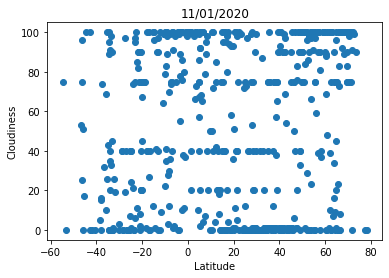

In [28]:
x_lat = weather_df["Lat"]
y_cloud = weather_df["Cloudiness"]
plt.scatter(x_lat,y_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('11/01/2020')
plt.savefig("Images/Cloud_Lat.png")
plt.show()

## Latitude vs. Wind Speed Plot

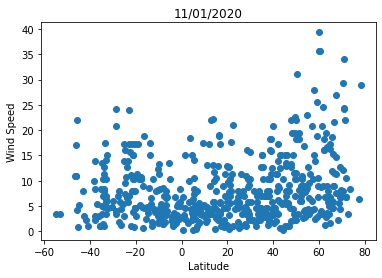

In [29]:
x_lat = weather_df["Lat"]
y_hum = weather_df["Wind Speed"]
plt.scatter(x_lat,y_hum)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('11/01/2020')
plt.savefig("Images/Wind_Lat.png")
plt.show()

## Linear Regression

In [14]:
import scipy.stats as st

In [15]:
south_hem = weather_df[weather_df["Lat"] < 0]
south_hem = south_hem.reset_index()
south_hem.head()

,level_0,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,Rikitea,-23.12,-134.97,73.92,86,95,24.00,PF,1604281811
1,1,1,Ushuaia,-54.80,-68.30,57.20,54,75,3.36,AR,1604281801
2,3,3,New Norfolk,-42.78,147.06,77.00,30,100,3.00,AU,1604282055
3,4,4,Vanimo,-2.67,141.30,86.52,64,76,6.80,PG,1604281875
4,5,5,Hobart,-42.88,147.33,75.99,52,0,8.05,AU,1604281620


In [16]:
north_hem = weather_df[weather_df["Lat"] >= 0]
north_hem = north_hem.reset_index()
north_hem.head()

,level_0,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2,2,Redwater,33.36,-94.25,57.20,47,1,3.36,US,1604282110
1,7,7,Sahuaripa,29.05,-109.23,78.73,19,0,8.68,MX,1604282111
2,9,9,Barrow,71.29,-156.79,28.40,63,75,21.92,US,1604281795
3,10,10,Albany,42.60,-73.97,39.99,80,97,8.46,US,1604281616
4,11,11,Chapais,49.78,-74.85,32.00,100,90,2.24,CA,1604282112


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

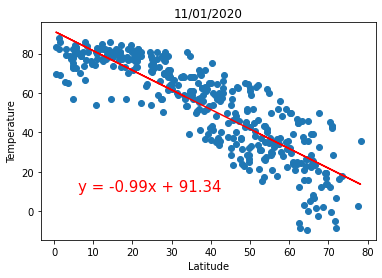

In [30]:
x_n_lat = north_hem["Lat"]
y_n_temp = north_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_n_lat, y_n_temp)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_n_lat,y_n_temp)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('11/01/2020')
plt.savefig("Images/N_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

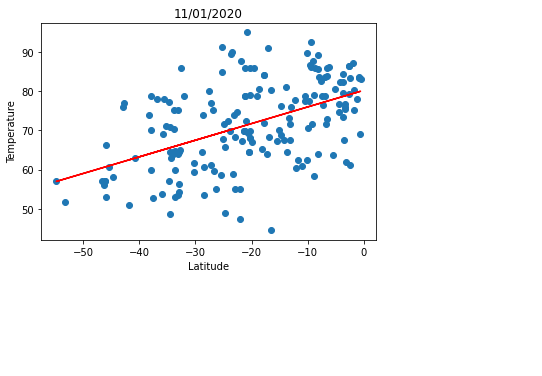

In [31]:
x_s_lat = south_hem["Lat"]
y_s_temp = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_s_lat, y_s_temp)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_s_lat,y_s_temp)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('11/01/2020')
plt.savefig("Images/S_Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

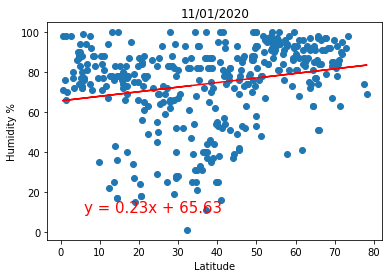

In [32]:
x_n_lat = north_hem["Lat"]
y_n_hum = north_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_n_lat, y_n_hum)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_n_lat,y_n_hum)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('11/01/2020')
plt.savefig("Images/N_Humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

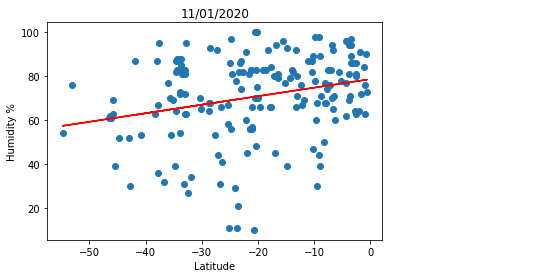

In [33]:
x_s_lat = south_hem["Lat"]
y_s_hum = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_s_lat, y_s_hum)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_s_lat,y_s_hum)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('11/01/2020')
plt.savefig("Images/S_Humid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

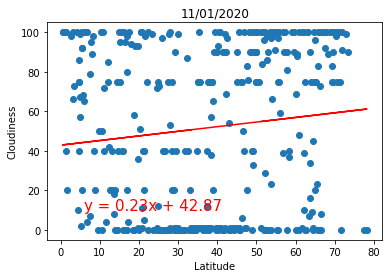

In [34]:
x_n_lat = north_hem["Lat"]
y_n_cloud = north_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_n_lat, y_n_cloud)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_n_lat,y_n_cloud)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('11/01/2020')
plt.savefig("Images/N_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

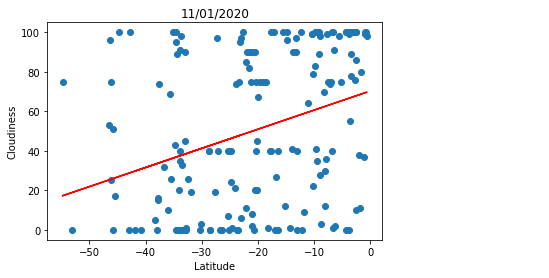

In [35]:
x_s_lat = south_hem["Lat"]
y_s_cloud = south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_s_lat, y_s_cloud)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_s_lat,y_s_cloud)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('11/01/2020')
plt.savefig("Images/S_Cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

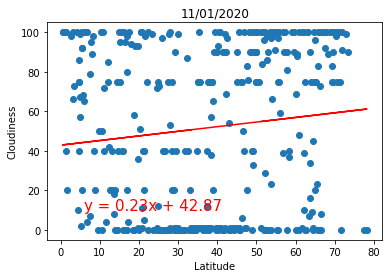

In [36]:
x_n_lat = north_hem["Lat"]
y_n_wind = north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_n_lat, y_n_cloud)
regress_values = x_n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_n_lat,y_n_cloud)
plt.plot(x_n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('11/01/2020')
plt.savefig("Images/N_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

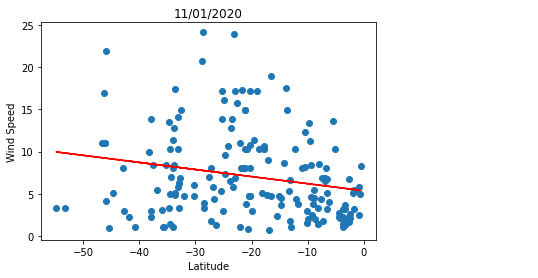

In [37]:
x_s_lat = south_hem["Lat"]
y_s_wind = south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_s_lat, y_s_wind)
regress_values = x_s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_s_lat,y_s_wind)
plt.plot(x_s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('11/01/2020')
plt.savefig("Images/S_Wind.png")
plt.show()